In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score,f1_score
import seaborn as sb
import matplotlib.pyplot as plt
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
heart_dataset=pd.read_csv("E:\Disease_Outbreak\Dataset\heart.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\user\AppData\Local\Temp\ipykernel_5884\767278106.py:1: SyntaxWarning: invalid escape sequence '\D'
  heart_dataset=pd.read_csv("E:\Disease_Outbreak\Dataset\heart.csv")


In [3]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_dataset.shape

(303, 14)

In [5]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
heart_dataset.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


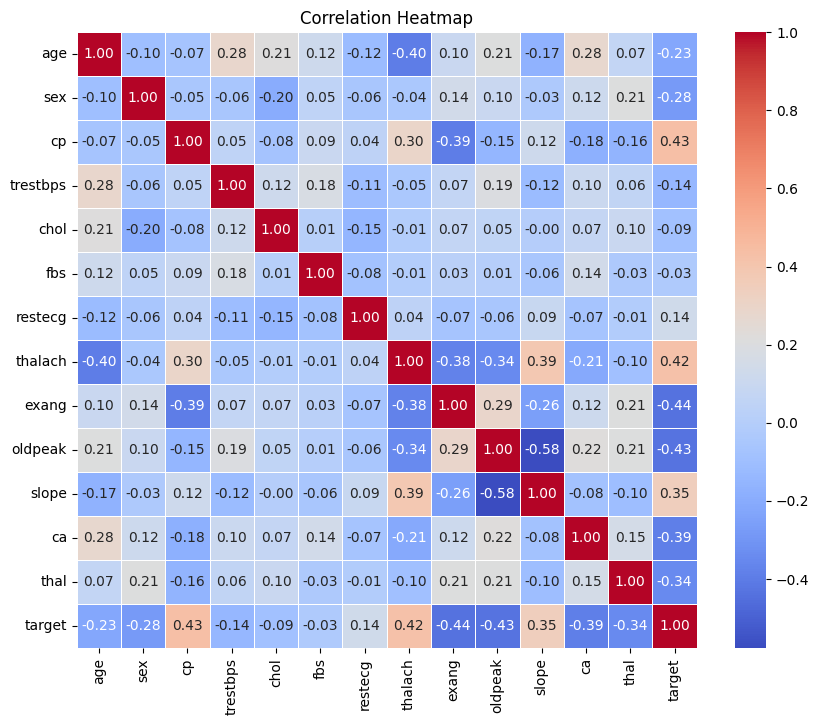

In [8]:
correlation_matrix = heart_dataset.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X=heart_dataset.drop(columns='target',axis=1)
y=heart_dataset['target']

In [10]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)


In [12]:
X_train.shape

(212, 13)

In [13]:
X_test.shape

(91, 13)

In [14]:
model=DecisionTreeClassifier(random_state=40)

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=40)

In [16]:
y_pred=model.predict(X_test)

In [17]:
print(f"Accuracy :{accuracy_score(y_pred,y_test)}")
print("-----------------------------------------------------------")
print(f"Precision :{precision_score(y_pred,y_test)}")
print("-----------------------------------------------------------")
print(f"recall_score :{recall_score(y_pred,y_test)}")
print("-----------------------------------------------------------")
print(f"confusion_matrix :\n{confusion_matrix(y_pred,y_test)}")

Accuracy :0.7912087912087912
-----------------------------------------------------------
Precision :0.7647058823529411
-----------------------------------------------------------
recall_score :0.8478260869565217
-----------------------------------------------------------
confusion_matrix :
[[33 12]
 [ 7 39]]


decsion tree with undersampling by tomelik

In [18]:
tomek=TomekLinks()
X_train_reshaped,y_train_reshaped=tomek.fit_resample(X_train,y_train)
print(X_train_reshaped.shape," ",y_train_reshaped.shape)
decsiontree_model=DecisionTreeClassifier(random_state=42)
decsiontree_model.fit(X_train_reshaped,y_train_reshaped)
decsiontree_modelpred=decsiontree_model.predict(X_test)

(183, 13)   (183,)


In [19]:
print(f"Accuracy :{accuracy_score(decsiontree_modelpred,y_test)}")
print("-----------------------------------------------------------")
print(f"Precision :{precision_score(decsiontree_modelpred,y_test)}")
print("-----------------------------------------------------------")
print(f"recall_score :{recall_score(decsiontree_modelpred,y_test)}")
print("-----------------------------------------------------------")
print(f"confusion_matrix :\n{confusion_matrix(decsiontree_modelpred,y_test)}")

Accuracy :0.7692307692307693
-----------------------------------------------------------
Precision :0.6862745098039216
-----------------------------------------------------------
recall_score :0.875
-----------------------------------------------------------
confusion_matrix :
[[35 16]
 [ 5 35]]


In [20]:
heart_dataset['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

Trying out logistic regression without resampling to check if it could give out better results

In [21]:
lr_model=LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)

d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [22]:
lr_pred=lr_model.predict(X_test)

In [23]:
print(f"Accuracy :{accuracy_score(lr_pred,y_test)}")
print("-----------------------------------------------------------")
print(f"Precision :{precision_score(lr_pred,y_test)}")
print("-----------------------------------------------------------")
print(f"recall_score :{recall_score(lr_pred,y_test)}")
print("-----------------------------------------------------------")
print(f"confusion_matrix :\n{confusion_matrix(lr_pred,y_test)}")

Accuracy :0.9120879120879121
-----------------------------------------------------------
Precision :0.9607843137254902
-----------------------------------------------------------
recall_score :0.8909090909090909
-----------------------------------------------------------
confusion_matrix :
[[34  2]
 [ 6 49]]


In [24]:
print(f"f1_score:{f1_score(lr_pred,y_test)}")
print("-----------------------------------------------------------")
print(f"roc_auc_score :{roc_auc_score(lr_pred,y_test)}")
print("-----------------------------------------------------------")

f1_score:0.9245283018867925
-----------------------------------------------------------
roc_auc_score :0.9176767676767676
-----------------------------------------------------------


In [25]:
import pickle
filename='heart_model.sav'
pickle.dump(lr_model,open(filename,'wb'))